In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv('adult.csv')

# **EDA**

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.duplicated().sum()

52

In [6]:
dups = data[data.duplicated()]

In [7]:
data.drop(dups.index, inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data.replace({'?':np.nan}, inplace=True)

In [11]:
data.dropna(inplace=True)

In [12]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
bins = [15,20,30,40,50,100]
labels = ['teenage', 'young adult', 'adult', 'old man', 'senior citizen']

In [14]:
age_cat = pd.cut(data.age.values, bins, labels=labels)
age_cat = np.array(age_cat)
age_cat

array(['young adult', 'adult', 'young adult', ..., 'senior citizen',
       'young adult', 'senior citizen'], dtype=object)

In [15]:
df = data.copy()

In [16]:
df['age'] = age_cat

In [17]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,young adult,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,adult,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,young adult,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,old man,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,adult,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,young adult,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,adult,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,senior citizen,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,young adult,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
age = df['age'].value_counts()
age

age
adult             12285
young adult       11272
old man            9980
senior citizen     8680
teenage            2958
Name: count, dtype: int64

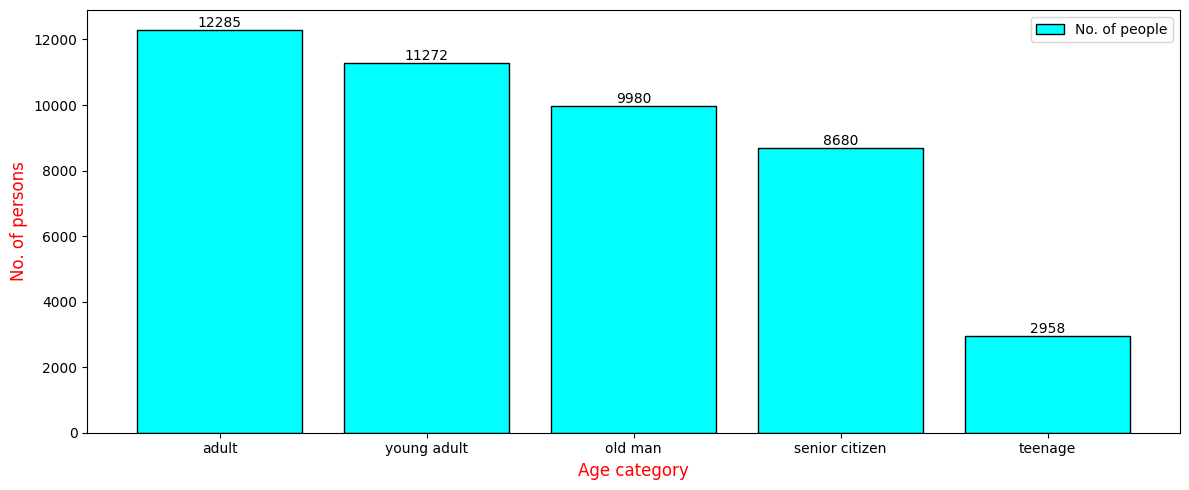

In [19]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(age.index, age.values, color = 'cyan', label = 'No. of people', edgecolor = 'k')
plt.bar_label(bar)
plt.xlabel('Age category', fontsize = 12, color = 'r')
plt.ylabel('No. of persons', fontsize = 12, color = 'r')
plt.tight_layout()
plt.legend()
plt.show()

According to Census, Most of the people lie in the **young adult - adult** category

In [20]:
workclass = df['workclass'].value_counts()
workclass

workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

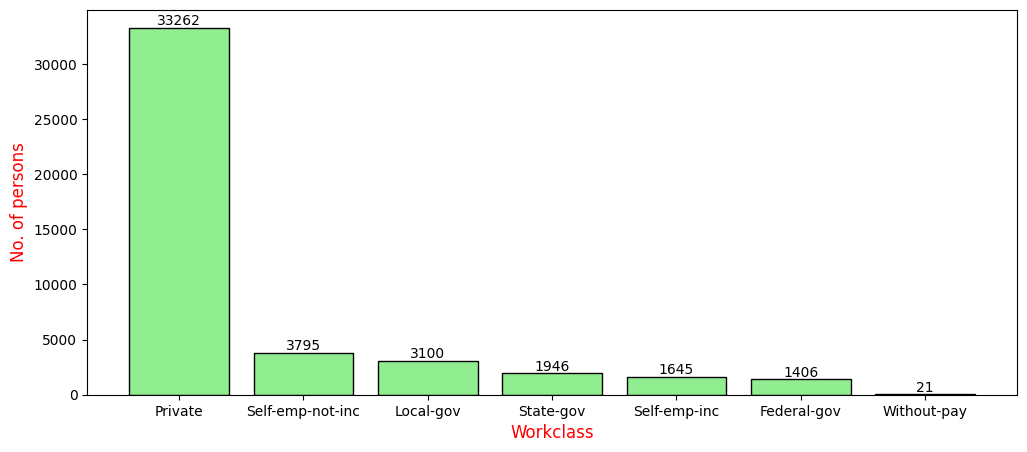

In [21]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(workclass.index, workclass.values, color = 'lightgreen', edgecolor = 'k')
plt.xlabel('Workclass', color = 'r', fontsize = 12)
plt.ylabel('No. of persons', color = 'r', fontsize = 12)
plt.bar_label(bar)
plt.show()

In [22]:
33262/len(df)

0.7362921970116215

Approximately 74 percent of the census population work in **Private Sector**

In [23]:
education = df['education'].value_counts()
education

education
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: count, dtype: int64

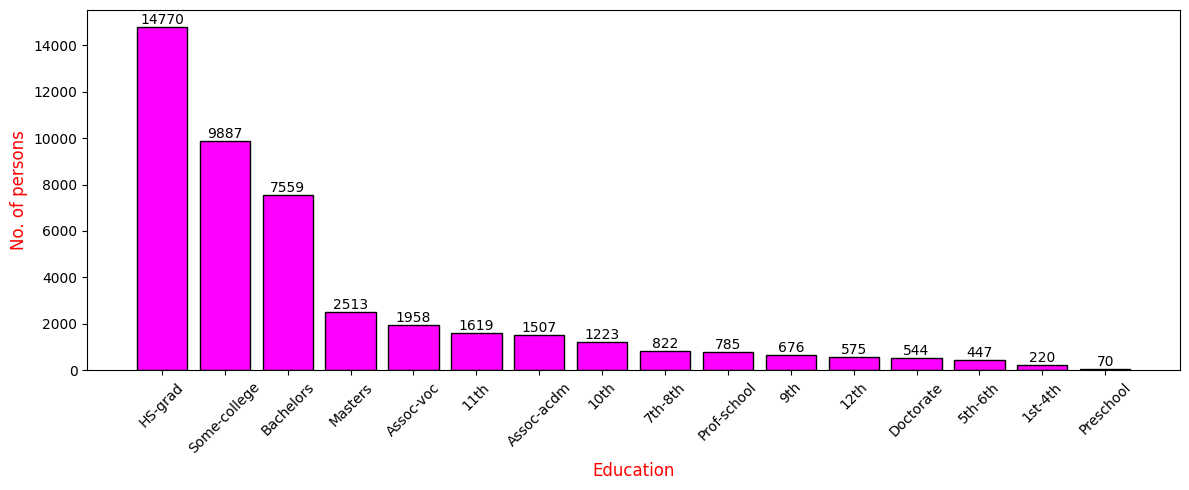

In [24]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(education.index, education.values, color = 'magenta', edgecolor = 'k')
plt.bar_label(bar)
plt.xticks(rotation = 45)
plt.xlabel('Education', color = 'r', fontsize = 12)
plt.ylabel('No. of persons', color = 'r', fontsize = 12)
plt.tight_layout()
plt.show()

Majority of the people have completed their High school graduation

In [25]:
marital = df['marital-status'].value_counts()
marital

marital-status
Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

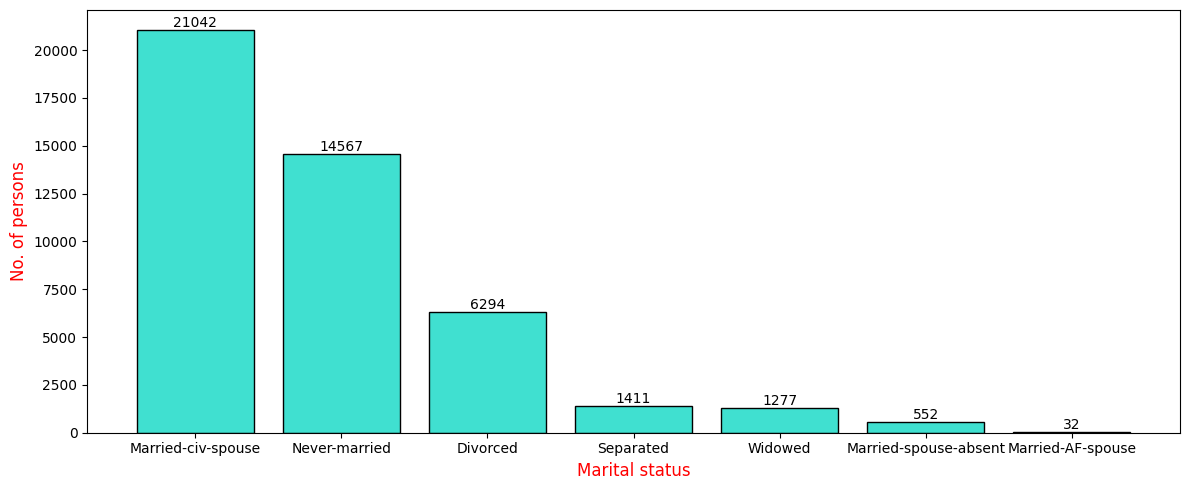

In [26]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(marital.index, marital.values, color = 'turquoise', edgecolor = 'k')
plt.bar_label(bar)
plt.xlabel('Marital status', color = 'r', fontsize = 12)
plt.ylabel('No. of persons', color = 'r', fontsize = 12)
plt.tight_layout()
plt.show()

In [27]:
occupation = df['occupation'].value_counts()
occupation

occupation
Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: count, dtype: int64

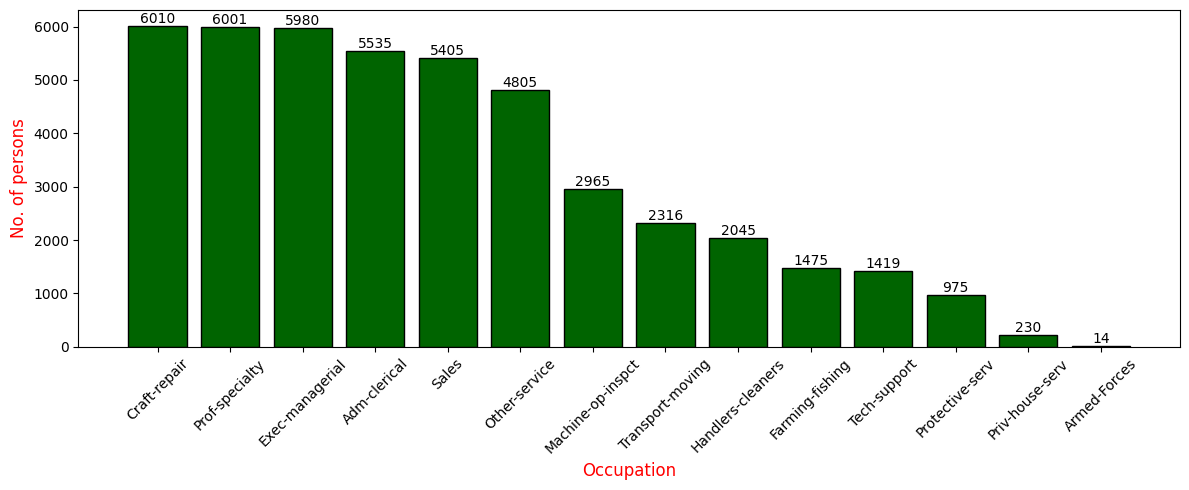

In [28]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(occupation.index, occupation.values, color = 'darkgreen', edgecolor = 'k')
plt.bar_label(bar)
plt.xticks(rotation = 45)
plt.xlabel('Occupation', color = 'r', fontsize = 12)
plt.ylabel('No. of persons', color = 'r', fontsize = 12)
plt.tight_layout()
plt.show()

In [29]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [30]:
relationship = df['relationship'].value_counts()
relationship

relationship
Husband           18653
Not-in-family     11679
Own-child          6616
Unmarried          4787
Wife               2091
Other-relative     1349
Name: count, dtype: int64

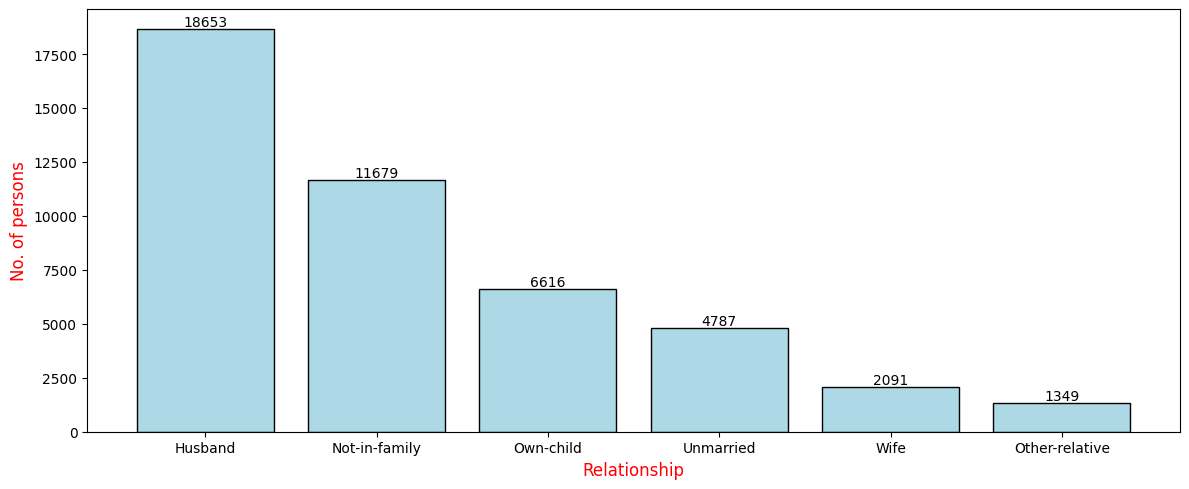

In [31]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(relationship.index, relationship.values, color = 'lightblue', edgecolor = 'k')
plt.bar_label(bar)
plt.xlabel('Relationship', color = 'r', fontsize = 12)
plt.ylabel('No. of persons', color = 'r', fontsize = 12)
plt.tight_layout()
plt.show()

In [32]:
race = df['race'].value_counts()
race

race
White                 38859
Black                  4227
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64

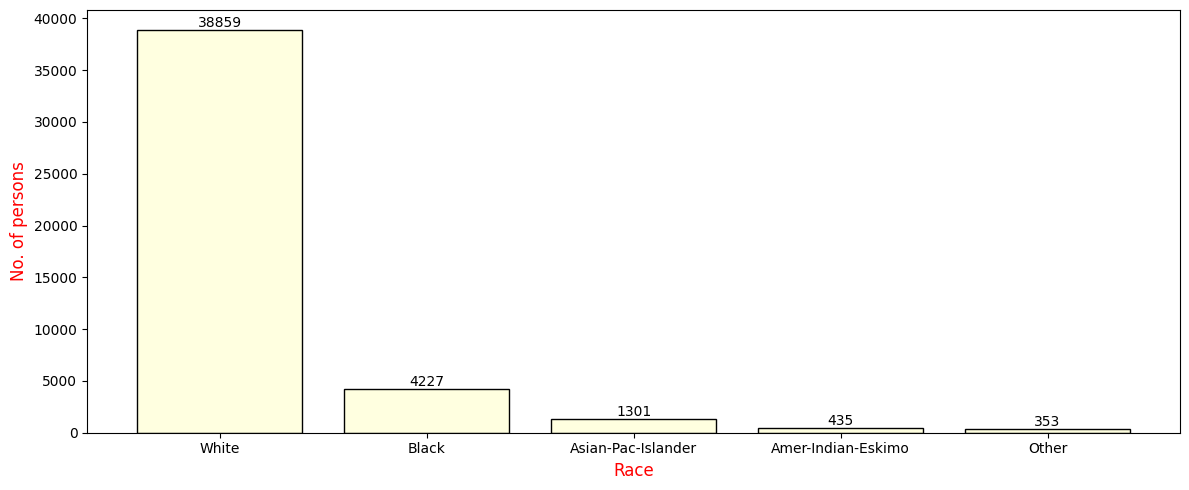

In [33]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(race.index, race.values, color = 'lightyellow', edgecolor = 'k')
plt.bar_label(bar)
plt.xlabel('Race', color = 'r', fontsize = 12)
plt.ylabel('No. of persons', color = 'r', fontsize = 12)
plt.tight_layout()
plt.show()

In [34]:
country = df['native-country'].value_counts()
country

native-country
United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [35]:
income = df['income'].value_counts()
income

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

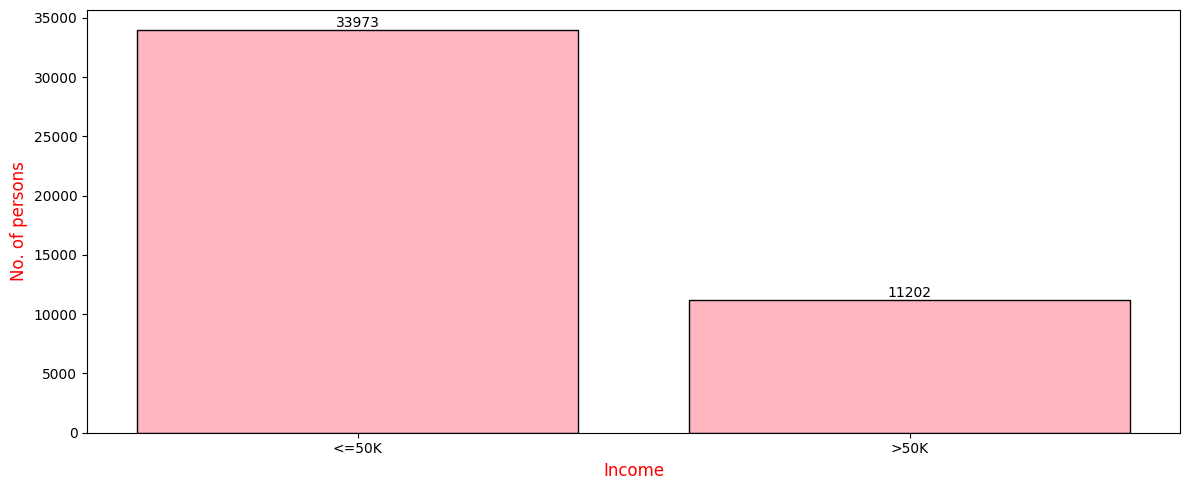

In [36]:
figure = plt.figure(figsize=(12,5))
bar = plt.bar(income.index, income.values, color = 'lightpink', edgecolor = 'k')
plt.bar_label(bar)
plt.xlabel('Income', color = 'r', fontsize = 12)
plt.ylabel('No. of persons', color = 'r', fontsize = 12)
plt.tight_layout()
plt.show()

# **Preprocessing**

In [37]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)

In [39]:
xtrain_cat = xtrain.select_dtypes('object')
xtest_cat = xtest.select_dtypes('object')

In [40]:
oe = OrdinalEncoder()

In [41]:
xtrain[xtrain_cat.columns] = oe.fit_transform(xtrain_cat)
xtest[xtest_cat.columns] = oe.transform(xtest_cat)

In [42]:
stdsc = StandardScaler()

In [43]:
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [44]:
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

# **Logistic Regression**

In [45]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [46]:
ypred = logreg.predict(xtest)

In [47]:
cmat = confusion_matrix(ytest, ypred)
cmat

array([[7972,  529],
       [1478, 1315]])

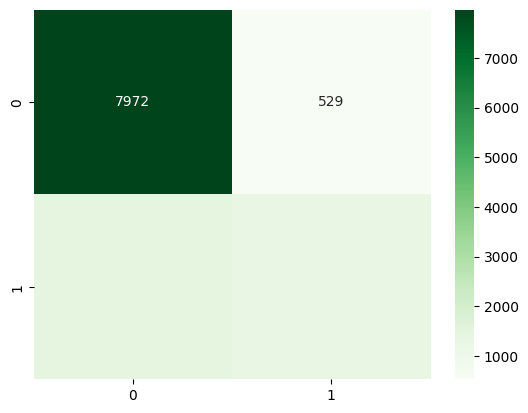

In [48]:
sns.heatmap(cmat, annot=True, cmap = 'Greens', fmt = 'd')
plt.show()

In [49]:
accuracy_score(ytest,ypred)

0.822295023906499

In [50]:
f1_score(ytest,ypred)

0.5671770541298253

# **Decision Tree**

In [51]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [52]:
ypred = dt.predict(xtest)

In [53]:
cmat = confusion_matrix(ytest, ypred)
cmat

array([[7361, 1140],
       [1024, 1769]])

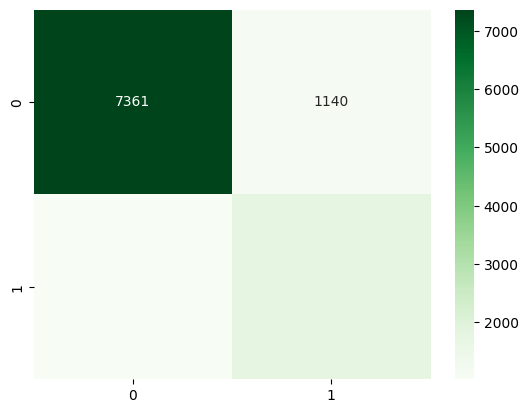

In [54]:
sns.heatmap(cmat, annot=True, cmap = 'Greens', fmt = 'd')
plt.show()

In [55]:
accuracy_score(ytest,ypred)

0.8083938374358066

In [56]:
f1_score(ytest,ypred)

0.6204840406874781

# **Random Forest**

In [57]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [58]:
ypred = rf.predict(xtest)

In [59]:
cmat = confusion_matrix(ytest, ypred)
cmat

array([[7815,  686],
       [1000, 1793]])

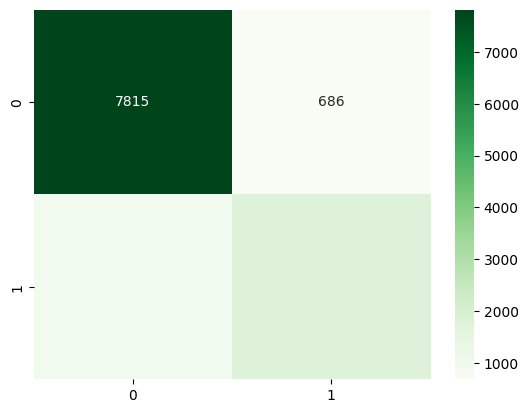

In [60]:
sns.heatmap(cmat, annot=True, cmap = 'Greens', fmt = 'd')
plt.show()

In [61]:
accuracy_score(ytest,ypred)

0.8507171949707809

In [62]:
f1_score(ytest,ypred)

0.6801972685887709

# **Best Model**

Among the models, **Random Forest** has good accuracy as well as good F1 score, hence Random Forest model will be used.